In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Bidirectional, LSTM, Dropout, BatchNormalization,CuDNNLSTM
import re    #for regex
import seaborn as sns
import matplotlib.pyplot as plt
import string
from tensorflow import keras
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D,SpatialDropout1D,GlobalAveragePooling1D, LSTM, SimpleRNN

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
train = pd.read_csv('G:/toxic_final.csv')

In [173]:
train.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
comment_text    object
Toxic            int64
dtype: object

In [174]:
train

,Unnamed: 0,Unnamed: 0.1,comment_text,Toxic
0,0,61,discussion requires both parties to explain th...,0
1,1,40630,avoiding edit wars acroterion i have been tr...,0
2,2,12124,omg i have never thought of it that way pure g...,0
3,3,11380,because of our recent edits to skycable the us...,0
4,4,5844,no harm done i deleted the second comment,0
...,...,...,...,...
41034,41034,43459,new mutants putlocker about to be the google ...,1
41035,41035,43460,it was better than the new mutants there were ...,1
41036,41036,43461,whenever i think that I am truly fast furious...,1
41037,41037,43462,my man was not to happy i left on this harley ...,1


In [175]:
train['comment_text'] = pd.DataFrame(train["comment_text"].astype('str')) 

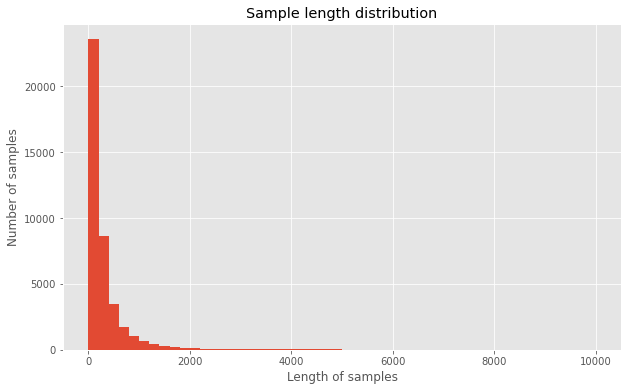

In [176]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(train['comment_text'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [177]:
num_duplicates = train.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 0 duplicate reviews present in the dataset


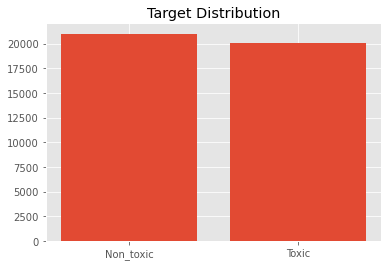

In [178]:
target_count = train.groupby('Toxic').size().reset_index(name='counts')
plt.bar(target_count.Toxic, target_count.counts)
plt.xticks([0,1], labels=["Non_toxic", "Toxic"])
plt.title("Target Distribution")
plt.show()

In [179]:
x=train["comment_text"]
y=train["Toxic"]

In [180]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=3,shuffle=True)

In [181]:
max_feature = 3000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [182]:
sequences = tokenizer.texts_to_sequences(train_x)

In [183]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [184]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [185]:
word_index = tokenizer.word_index

In [186]:
embeddings_index = {}
with open("G:/glove.6B/glove.6B.100d.txt", 'r', encoding="utf-8") as f:#100dim
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()



In [187]:
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [188]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [189]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
lstm_model=Sequential()
lstm_model.add(Embedding(len(word_index)+1, #Vocablury number
                                    100, #Embedding dim
                                    weights=[embedding_matrix], #Embeddings matrix pre-trained model
                                    trainable=False, #False.
                                  input_length=500))#maxlens
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 100)          6979000   
_________________________________________________________________
dropout_28 (Dropout)         (None, 500, 100)          0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 64)                42240     
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 7,021,305
Trainable params: 42,305
Non-trainable params: 6,979,000
_________________________________________________________________
None


In [190]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=5, verbose=2, mode='auto', restore_best_weights=True)
history = lstm_model.fit(x=pad_sequences, y=train_y, batch_size=64, verbose=1, epochs=20, validation_split= 0.1,shuffle=True,callbacks=[callback])

Epoch 1/20
462/462 [==============================] - 18s 33ms/step - loss: 0.3539 - accuracy: 0.8447 - val_loss: 0.2603 - val_accuracy: 0.8998
Epoch 2/20
462/462 [==============================] - 15s 32ms/step - loss: 0.2615 - accuracy: 0.8907 - val_loss: 0.2260 - val_accuracy: 0.9090
Epoch 3/20
462/462 [==============================] - 15s 32ms/step - loss: 0.2414 - accuracy: 0.9010 - val_loss: 0.2247 - val_accuracy: 0.9035
Epoch 4/20
462/462 [==============================] - 15s 32ms/step - loss: 0.2285 - accuracy: 0.9061 - val_loss: 0.2096 - val_accuracy: 0.9141
Epoch 5/20
462/462 [==============================] - 15s 32ms/step - loss: 0.2185 - accuracy: 0.9106 - val_loss: 0.2193 - val_accuracy: 0.9123
Epoch 6/20
462/462 [==============================] - 15s 32ms/step - loss: 0.2145 - accuracy: 0.9115 - val_loss: 0.2075 - val_accuracy: 0.9126
Epoch 7/20
462/462 [==============================] - 15s 32ms/step - loss: 0.2095 - accuracy: 0.9132 - val_loss: 0.2070 - val_accuracy:

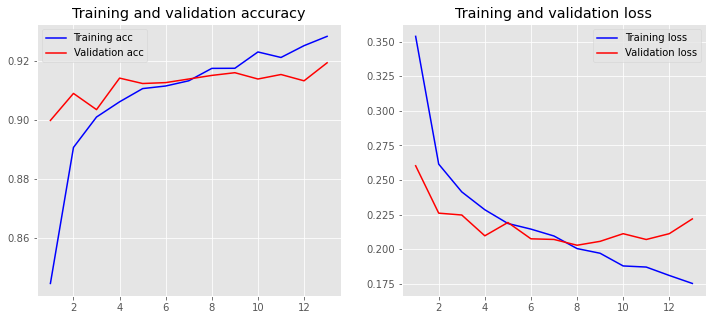

In [191]:
plot_history(history)

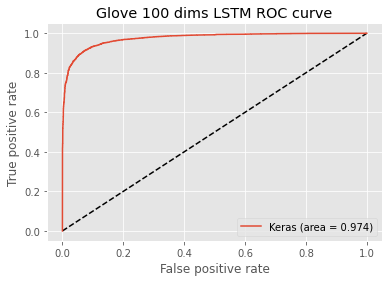

In [192]:
from sklearn.metrics import roc_curve
y_pred=lstm_model.predict(x_testing).ravel()
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Glove 100 dims LSTM ROC curve')
plt.legend(loc='best')
plt.show()

In [193]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.44351283
              precision    recall  f1-score   support

           0     0.9128    0.9302    0.9214      4154
           1     0.9270    0.9090    0.9179      4054

    accuracy                         0.9197      8208
   macro avg     0.9199    0.9196    0.9197      8208
weighted avg     0.9198    0.9197    0.9197      8208



In [194]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(len(word_index)+1, #Vocablury number
                                    100, #Embedding dim
                                    weights=[embedding_matrix], #Embeddings matrix pre-trained model
                                    trainable=False, #False.
                                  input_length=500))#maxlens
bi_model.add(Bidirectional(LSTM(64,return_sequences=True,dropout=0.3)))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(LSTM(64))) #lstm with 128 neurons
bi_model.add(Dense(1,activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(bi_model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 500, 100)          6979000   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 500, 128)          84480     
_________________________________________________________________
dropout_30 (Dropout)         (None, 500, 128)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 7,162,425
Trainable params: 183,425
Non-trainable params: 6,979,000
_________________________________________________________________
None


In [195]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=5, verbose=2, mode='auto', restore_best_weights=True)
history = bi_model.fit(x=pad_sequences, y=train_y, batch_size=64, verbose=1, epochs=20,  validation_split= 0.1,shuffle=True,callbacks=[callback])

Epoch 1/20
462/462 [==============================] - 70s 137ms/step - loss: 0.3168 - accuracy: 0.8640 - val_loss: 0.2446 - val_accuracy: 0.9041
Epoch 2/20
462/462 [==============================] - 61s 133ms/step - loss: 0.2437 - accuracy: 0.8992 - val_loss: 0.2278 - val_accuracy: 0.9065
Epoch 3/20
462/462 [==============================] - 63s 135ms/step - loss: 0.2412 - accuracy: 0.9011 - val_loss: 0.2145 - val_accuracy: 0.9153
Epoch 4/20
462/462 [==============================] - 62s 135ms/step - loss: 0.2167 - accuracy: 0.9113 - val_loss: 0.2333 - val_accuracy: 0.9059
Epoch 5/20
462/462 [==============================] - 63s 135ms/step - loss: 0.2063 - accuracy: 0.9151 - val_loss: 0.2112 - val_accuracy: 0.9163
Epoch 6/20
462/462 [==============================] - 62s 135ms/step - loss: 0.1994 - accuracy: 0.9181 - val_loss: 0.2075 - val_accuracy: 0.9178
Epoch 7/20
462/462 [==============================] - 62s 135ms/step - loss: 0.1932 - accuracy: 0.9195 - val_loss: 0.2097 - val_ac

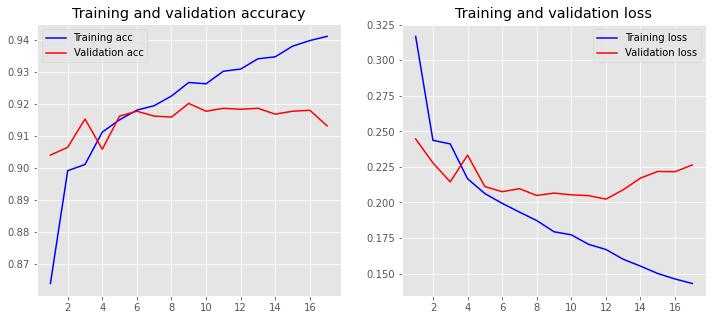

In [196]:
plot_history(history)

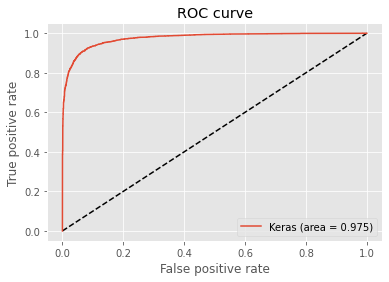

In [197]:
from sklearn.metrics import roc_curve
y_pred=bi_model.predict(x_testing).ravel()
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [198]:
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import classification_report
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.44786236
              precision    recall  f1-score   support

           0     0.9250    0.9179    0.9215      4154
           1     0.9165    0.9238    0.9201      4054

    accuracy                         0.9208      8208
   macro avg     0.9208    0.9208    0.9208      8208
weighted avg     0.9208    0.9208    0.9208      8208



In [199]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
stack_lstm_model=Sequential()
stack_lstm_model.add(Embedding(len(word_index)+1, #Vocablury number
                                    100, #Embedding dim
                                    weights=[embedding_matrix], #Embeddings matrix pre-trained model
                                    trainable=False, #False.
                                  input_length=500))#maxlens
stack_lstm_model.add(Dropout(0.3))
stack_lstm_model.add(LSTM(64,return_sequences=True))
stack_lstm_model.add(Dropout(0.3))
stack_lstm_model.add(LSTM(64))
stack_lstm_model.add(Dense(1,activation='sigmoid'))
stack_lstm_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(stack_lstm_model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 500, 100)          6979000   
_________________________________________________________________
dropout_31 (Dropout)         (None, 500, 100)          0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 500, 64)           42240     
_________________________________________________________________
dropout_32 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 7,054,329
Trainable params: 75,329
Non-trainable params: 6,979,000
______________________________________

In [200]:
stack_lstm_model.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [201]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=5, verbose=2, mode='auto', restore_best_weights=True)
history = stack_lstm_model.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 34s 65ms/step - loss: 0.3170 - accuracy: 0.8624 - val_loss: 0.2386 - val_accuracy: 0.9026
Epoch 2/20
462/462 [==============================] - 29s 63ms/step - loss: 0.2562 - accuracy: 0.8984 - val_loss: 0.2660 - val_accuracy: 0.8846
Epoch 3/20
462/462 [==============================] - 29s 63ms/step - loss: 0.2309 - accuracy: 0.9048 - val_loss: 0.2164 - val_accuracy: 0.9123
Epoch 4/20
462/462 [==============================] - 29s 63ms/step - loss: 0.2215 - accuracy: 0.9095 - val_loss: 0.2125 - val_accuracy: 0.9123
Epoch 5/20
462/462 [==============================] - 29s 63ms/step - loss: 0.2123 - accuracy: 0.9136 - val_loss: 0.2117 - val_accuracy: 0.9163
Epoch 6/20
462/462 [==============================] - 29s 63ms/step - loss: 0.2041 - accuracy: 0.9171 - val_loss: 0.2057 - val_accuracy: 0.9172
Epoch 7/20
462/462 [==============================] - 29s 63ms/step - loss: 0.1971 - accuracy: 0.9178 - val_loss: 0.2058 - val_accuracy:

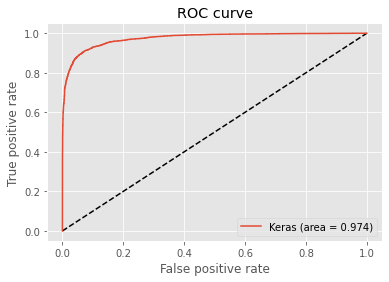

In [202]:
from sklearn.metrics import roc_curve
y_pred=stack_lstm_model.predict(x_testing).ravel()
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [203]:
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import classification_report
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.3729012
              precision    recall  f1-score   support

           0     0.9134    0.9273    0.9203      4154
           1     0.9243    0.9100    0.9171      4054

    accuracy                         0.9187      8208
   macro avg     0.9189    0.9186    0.9187      8208
weighted avg     0.9188    0.9187    0.9187      8208



In [180]:
bi_model.save('week7_1model')

INFO:tensorflow:Assets written to: week6_1model\assets


INFO:tensorflow:Assets written to: week6_1model\assets


In [259]:
from tensorflow.keras.models import load_model 
new_model = tf.keras.models.load_model('week6_1model')

In [62]:
sample_text=["This movie is kind of a mixed bag. There are certain elements of it that I think are creative, but by far it is definitely one of the lesser Marvel films. The only thing I disagree with Martin Scorsese about is that Marvel movies are like theme park rides because there are ones like Endgame, Thor Ragnarok (my personal favourite Marvel movie), Civil War, The Avengers, Infinity War and many others that have a far deeper meaning and much more than just entertainment. Overall, Venom is one of those okay movies that doesn't deserve hate, the scenes where the Venom inside Tom Hardy's character is talking to him are pretty hilarious"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [58]:
sample_text=["Only saw this once or twice - I don't remember - many years ago; haven't been interested in seeing it again since there was a time when I was younger and I slightly enjoyed dumb movies but this went to deep into stupidity. That's about it - nothing good about it just a drag!"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [56]:
sample_text=["I enjoyed watching the movie, but it is obvious from its name and poster that it is a terrible movie. I don't regret watching :)"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [62]:
sample_text=["There seems to be quite a bit of agreement on what Im about to say about the film. Venom doesnt quite know what it is. It cant decide wether its a goofy, action or a horror movie. Therefore its all of it and none at the same time. The goofy jokes are pretty lame, which is why they are funny, you dont laugh with the writers, you laugh at them. The action scenes are meh at best, car chase : check motorcycle : check ridiculous (bad) cgi fight: check sure, watching Tom Hardy motorcross in San Francisco is quite fun, but its not really action. Finally, the horror; there are glimpses, glimmers of hope scattered around this movie. Little snippets of what could have been, but as soon as they appear they disappear. Two scenes really stood out to me due to their potential. After quite a lot of buildup of Venom getting into the building (BY RUNNING UP IT), Eddie decides to take the lift down. Instead of having Eddie walk into the SWAT team, they should have been swarming the building crawling through the floors looking for him. Then, they could have had an ALIEN like hunting scene where Venom slowly takes out the task force one by one, in true horror movie fashion. The other obvious horror scene could have been using the creepy little girl that delivers RIOT to the Musk wannabe, they could have homaged The Shining, they could have pulled an exorcist, they could have done a million things, but the little girl just has white pupils and a deep voice. Throughout the movie there are just continuous disappointments because you see what it is missing. Instead of the cheap love story and all the stupid overdone things they should have been ballsy with their movie. Yes the movie DID make 800+ million, however im sure it was going to do that anyway. Venom is probably one of the most badass characters in comic history, and Tom Hardy is Tom Hardy. I would have loved to see something along these lines: Symbiote hunts Eddie. Symbiote captures Eddie and they become Venom. Venom starts unleashing hell because he can, hunts SWAT etc. Venom goes after Musk wannabe and Kills him. Throw some more horror elements in there, and it would have made for a much more satisfactory watch. I have always adored Venom, and this movie had so much potential, but it was all for nothing. No rewatchability. Nothing worth remembering. Just a flick. It was funny seeing Tom Hardy being a bit of a pussball, but even he cant help a crap script and an even worse film."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [63]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [58]:
pad_sequences

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [69]:
sample_text=["Started Binging to Catch up and WOW what a PIECE OF CRAP"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [94]:
sample_text=["This latest offering is another disaster yet again from Daniel Craig. Besides his first movie viz. Casino Royale all the rest have been totally useless. It was an absolute burden to sit throught this 2.40 hrs long film. Definitely for me, the James Bond franchise has lost the absolute magical touch it used to have in the days of Sean Connery and Roger"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [104]:
sample_text=[""]
sequences = tokenizer.texts_to_sequences(sample_text)

In [51]:
sample_text=["I enjoyed watching the movie, but it is obvious from its name and poster that it is a terrible movie. I don't regret watching :)"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [79]:
sample_text=["When you wake up from a good dream, you feel the reality is harsh. When you wake up after a bad dream, you will be sentimentally attached to the beauty of reality. But as long as life is good, reality and dreams don't matter."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [80]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [81]:
pad_sequences

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [82]:
predictions =bi_model.predict(pad_sequences) 

In [230]:
predictions =new_model.predict(pad_sequences) 

In [83]:
predictions 

array([[0.6534879]], dtype=float32)

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"    
    
hub_layer = hub.KerasLayer(embedding,output_shape=[128], input_shape=[], dtype=tf.string, trainable=True)